In [1]:
from utils.plot import visualize_colored_mnist
from utils.data_loader import load_MNISTdata, get_colored_mnist_dataloader
from models import MLPGAN, CNNGAN, SNGAN, GPTGAN
from training.train_GAN import train_BasicGAN, train_GPTBasicGAN
from evaluation.metrics import compute_inception_score, compute_fid, compute_precision_recall
import torch
from evaluation.evaluate_BasicGAN import generate_BasicGAN

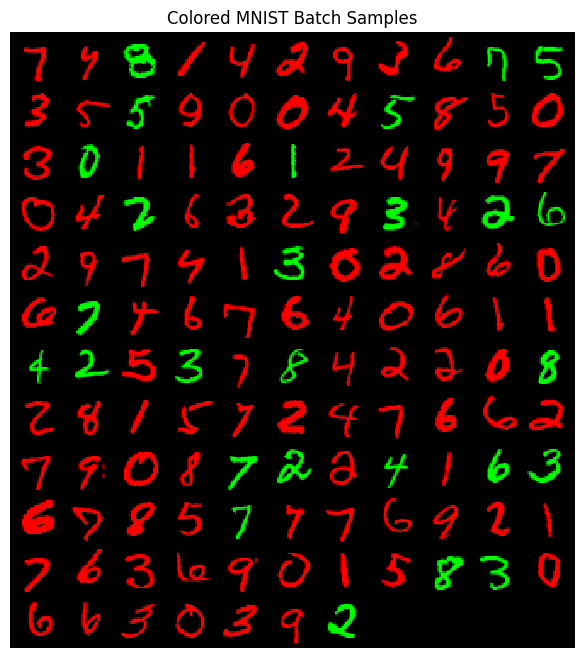

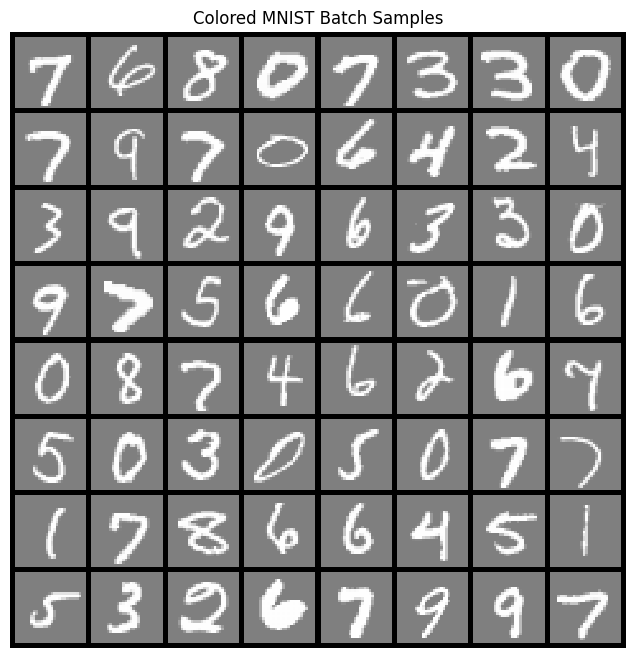

In [2]:
train_loader, _ = load_MNISTdata()  # Load MNIST using your function
colored_mnist_loader = get_colored_mnist_dataloader(train_loader.dataset, batch_size=128, minority_ratio=0.2)
visualize_colored_mnist(colored_mnist_loader)
visualize_colored_mnist(train_loader)

In [3]:
latent_dim=100

sngen = GPTGAN.SNGAN_Generator(nc=1)
sndis = GPTGAN.SNGAN_Discriminator(nc=1)

train_GPTBasicGAN(generator=sngen, discriminator=sndis, dataloader=train_loader, lr=0.001,n_epochs=10, plotit=True)

Epoch [1/10] | D Loss: 0.0000 | G Loss: 15.7212


KeyboardInterrupt: 

In [ ]:
latent_dim=100

sngen = SNGAN.Generator(latent_dim, img_channels=1)
sndis = SNGAN.Discriminator(img_channels=1)

train_GPTBasicGAN(generator=sngen, discriminator=sndis, dataloader=train_loader, lr=0.0002,n_epochs=50, plotit=True)

Epoch [1/50] | D Loss: 1.0962 | G Loss: 0.8624
Epoch [2/50] | D Loss: 1.1309 | G Loss: 0.9710


KeyboardInterrupt: 

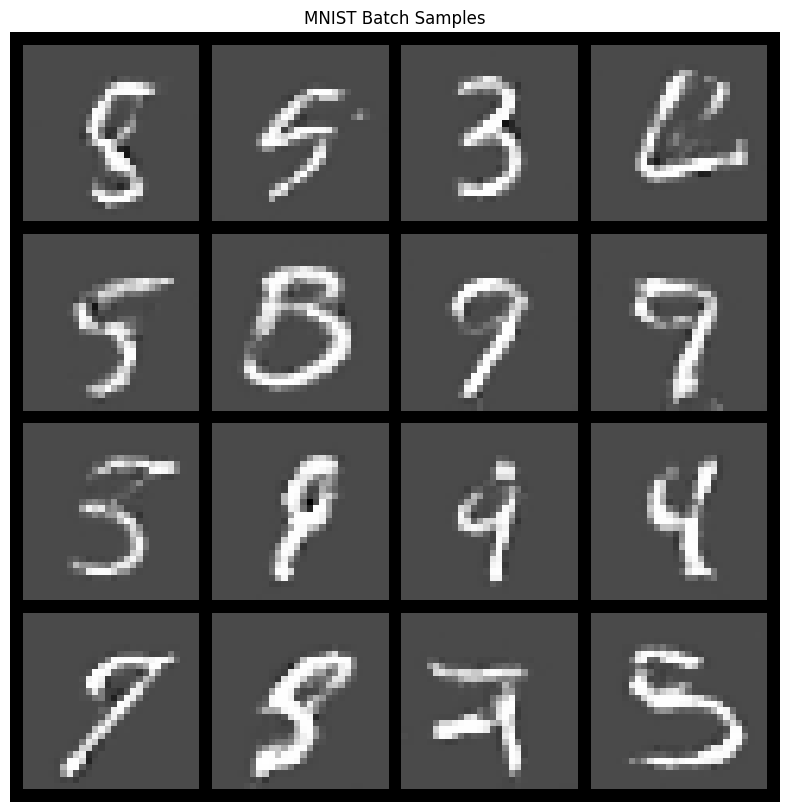

In [ ]:
generated_images_sn_gray = generate_BasicGAN(sngen, num_samples=1024,plotit=True)

In [ ]:
real_imgs, _ = next(iter(train_loader))

# If batch size of your DataLoader is already 64, you're done!
real_imgs = real_imgs[:1024] 

is_mean, is_std = compute_inception_score(generated_images_sn_gray)
print(f"Inception Score: {is_mean:.2f} ± {is_std:.2f}")

# FID
fid = compute_fid(real_imgs, generated_images_sn_gray)
print(f"FID: {fid:.2f}")

precision, recall = compute_precision_recall(real_imgs, generated_images_sn_gray)
print(f"Precision: {precision:.10f}, Recall: {recall:.3f}")

c:\Users\sarpg\OneDrive\Masaüstü\Generative Neural Networks\GNN_env\lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Inception Score: 1.22 ± 0.04
FID: 73.68
Precision: 0.0000000000, Recall: 0.000


Epoch [1/10] | D Loss: 1.2312 | G Loss: 0.8714
Epoch [2/10] | D Loss: 1.1121 | G Loss: 0.9605
Epoch [3/10] | D Loss: 1.1815 | G Loss: 0.8923
Epoch [4/10] | D Loss: 1.1798 | G Loss: 0.9665
Epoch [5/10] | D Loss: 1.1937 | G Loss: 0.8724
Epoch [6/10] | D Loss: 1.1696 | G Loss: 0.8923
Epoch [7/10] | D Loss: 1.1732 | G Loss: 0.9560
Epoch [8/10] | D Loss: 1.1726 | G Loss: 0.9404
Epoch [9/10] | D Loss: 1.1863 | G Loss: 0.9989
Epoch [10/10] | D Loss: 1.3353 | G Loss: 0.7121


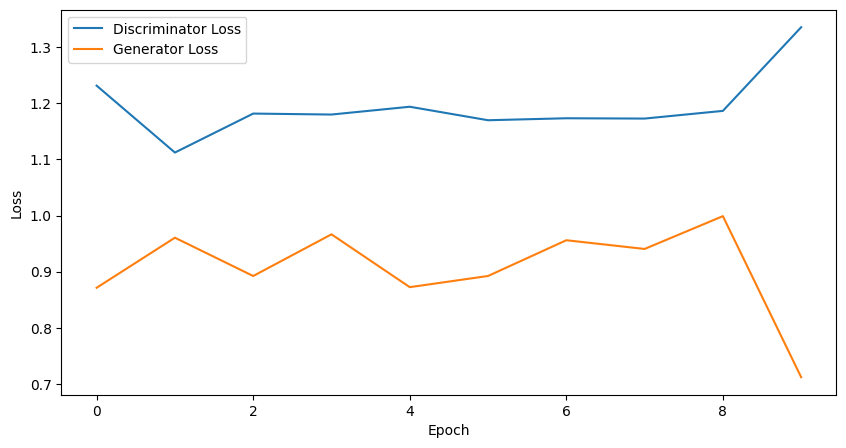

<function training.train_GAN.train_GPTBasicGAN.<locals>.get_generated_images(num_samples=500)>

In [ ]:
latent_dim=100

sngen = SNGAN.Generator(latent_dim)
sndis = SNGAN.Discriminator()

train_GPTBasicGAN(generator=sngen, discriminator=sndis, dataloader=colored_mnist_loader, lr=0.0002,n_epochs=50, plotit=True)

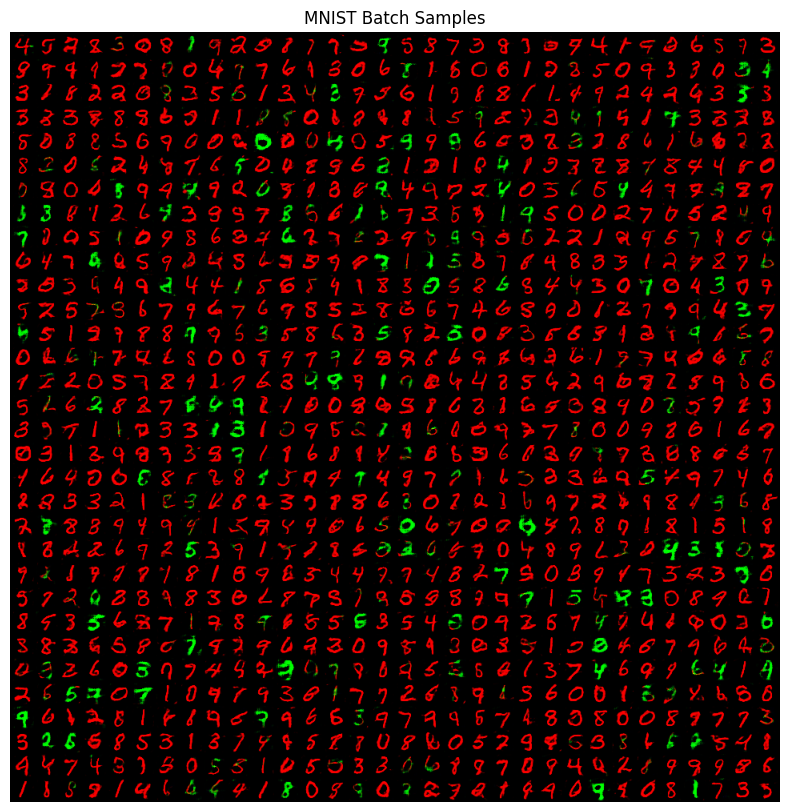

In [ ]:

generated_images_sn = generate_BasicGAN(sngen, num_samples=1024,plotit=True)

In [ ]:
real_imgs, _ = next(iter(colored_mnist_loader))

# If batch size of your DataLoader is already 64, you're done!
real_imgs = real_imgs[:1024] 

is_mean, is_std = compute_inception_score(generated_images_sn)
print(f"Inception Score: {is_mean:.2f} ± {is_std:.2f}")

# FID
fid = compute_fid(real_imgs, generated_images_sn)
print(f"FID: {fid:.2f}")

precision, recall = compute_precision_recall(real_imgs, generated_images_sn)
print(f"Precision: {precision:.10f}, Recall: {recall:.3f}")

c:\Users\sarpg\OneDrive\Masaüstü\Generative Neural Networks\GNN_env\lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Inception Score: 1.00 ± 0.00
FID: 36.89
Precision: 0.0000000000, Recall: 0.000
